## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## LOADING THE DATA

In [2]:
raw_data = pd.read_csv('worldhappiness.csv')

In [3]:
raw_data.head()

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [4]:
df = raw_data.copy()

In [5]:
df["Happiness Score Category"] = pd.cut(x=df["Happiness Score"],bins=[0,5,np.inf], labels=["Unhappy","Happy"])
df.head()

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Score Category
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Happy
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Happy
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Happy
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Happy
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Happy


In [6]:
df["Happiness Score Category"]= df["Happiness Score Category"].map({'Happy':1,'Unhappy':0})
df.head()

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Score Category
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


In [7]:
df = df.drop(['Unnamed: 0','Happiness Rank','Happiness Score','Country','Year'], axis=1)
df.head()

,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Score Category
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


# Splitting the Data

In [8]:
X = df.drop('Happiness Score Category', axis =1).copy()
X.head()

,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
Y = df['Happiness Score Category'].copy()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Happiness Score Category, dtype: category
Categories (2, int64): [0 < 1]

In [10]:
X.dtypes

GDP per Capita                  float64
Social support                  float64
Life Expectancy                 float64
Freedom to make life choices    float64
Perceptions of corruption       float64
Generosity                      float64
dtype: object

# Building Preliminary Classification Tree

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42)

In [12]:
clf_dt  = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=42)

[Text(0.41320140280561124, 0.9666666666666667, 'Life Expectancy <= 0.491\ngini = 0.464\nsamples = 698\nvalue = [256, 442]\nclass = Happy'),
 Text(0.16032064128256512, 0.9, 'GDP per Capita <= 0.668\ngini = 0.217\nsamples = 194\nvalue = [170, 24]\nclass = Unhappy'),
 Text(0.09619238476953908, 0.8333333333333334, 'Perceptions of corruption <= 0.282\ngini = 0.091\nsamples = 146\nvalue = [139, 7]\nclass = Unhappy'),
 Text(0.06412825651302605, 0.7666666666666667, 'Social support <= 0.565\ngini = 0.056\nsamples = 140\nvalue = [136, 4]\nclass = Unhappy'),
 Text(0.04809619238476954, 0.7, 'Social support <= 0.554\ngini = 0.172\nsamples = 42\nvalue = [38, 4]\nclass = Unhappy'),
 Text(0.03206412825651302, 0.6333333333333333, 'Perceptions of corruption <= 0.123\ngini = 0.136\nsamples = 41\nvalue = [38, 3]\nclass = Unhappy'),
 Text(0.01603206412825651, 0.5666666666666667, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = Unhappy'),
 Text(0.04809619238476954, 0.5666666666666667, 'Freedom to make li

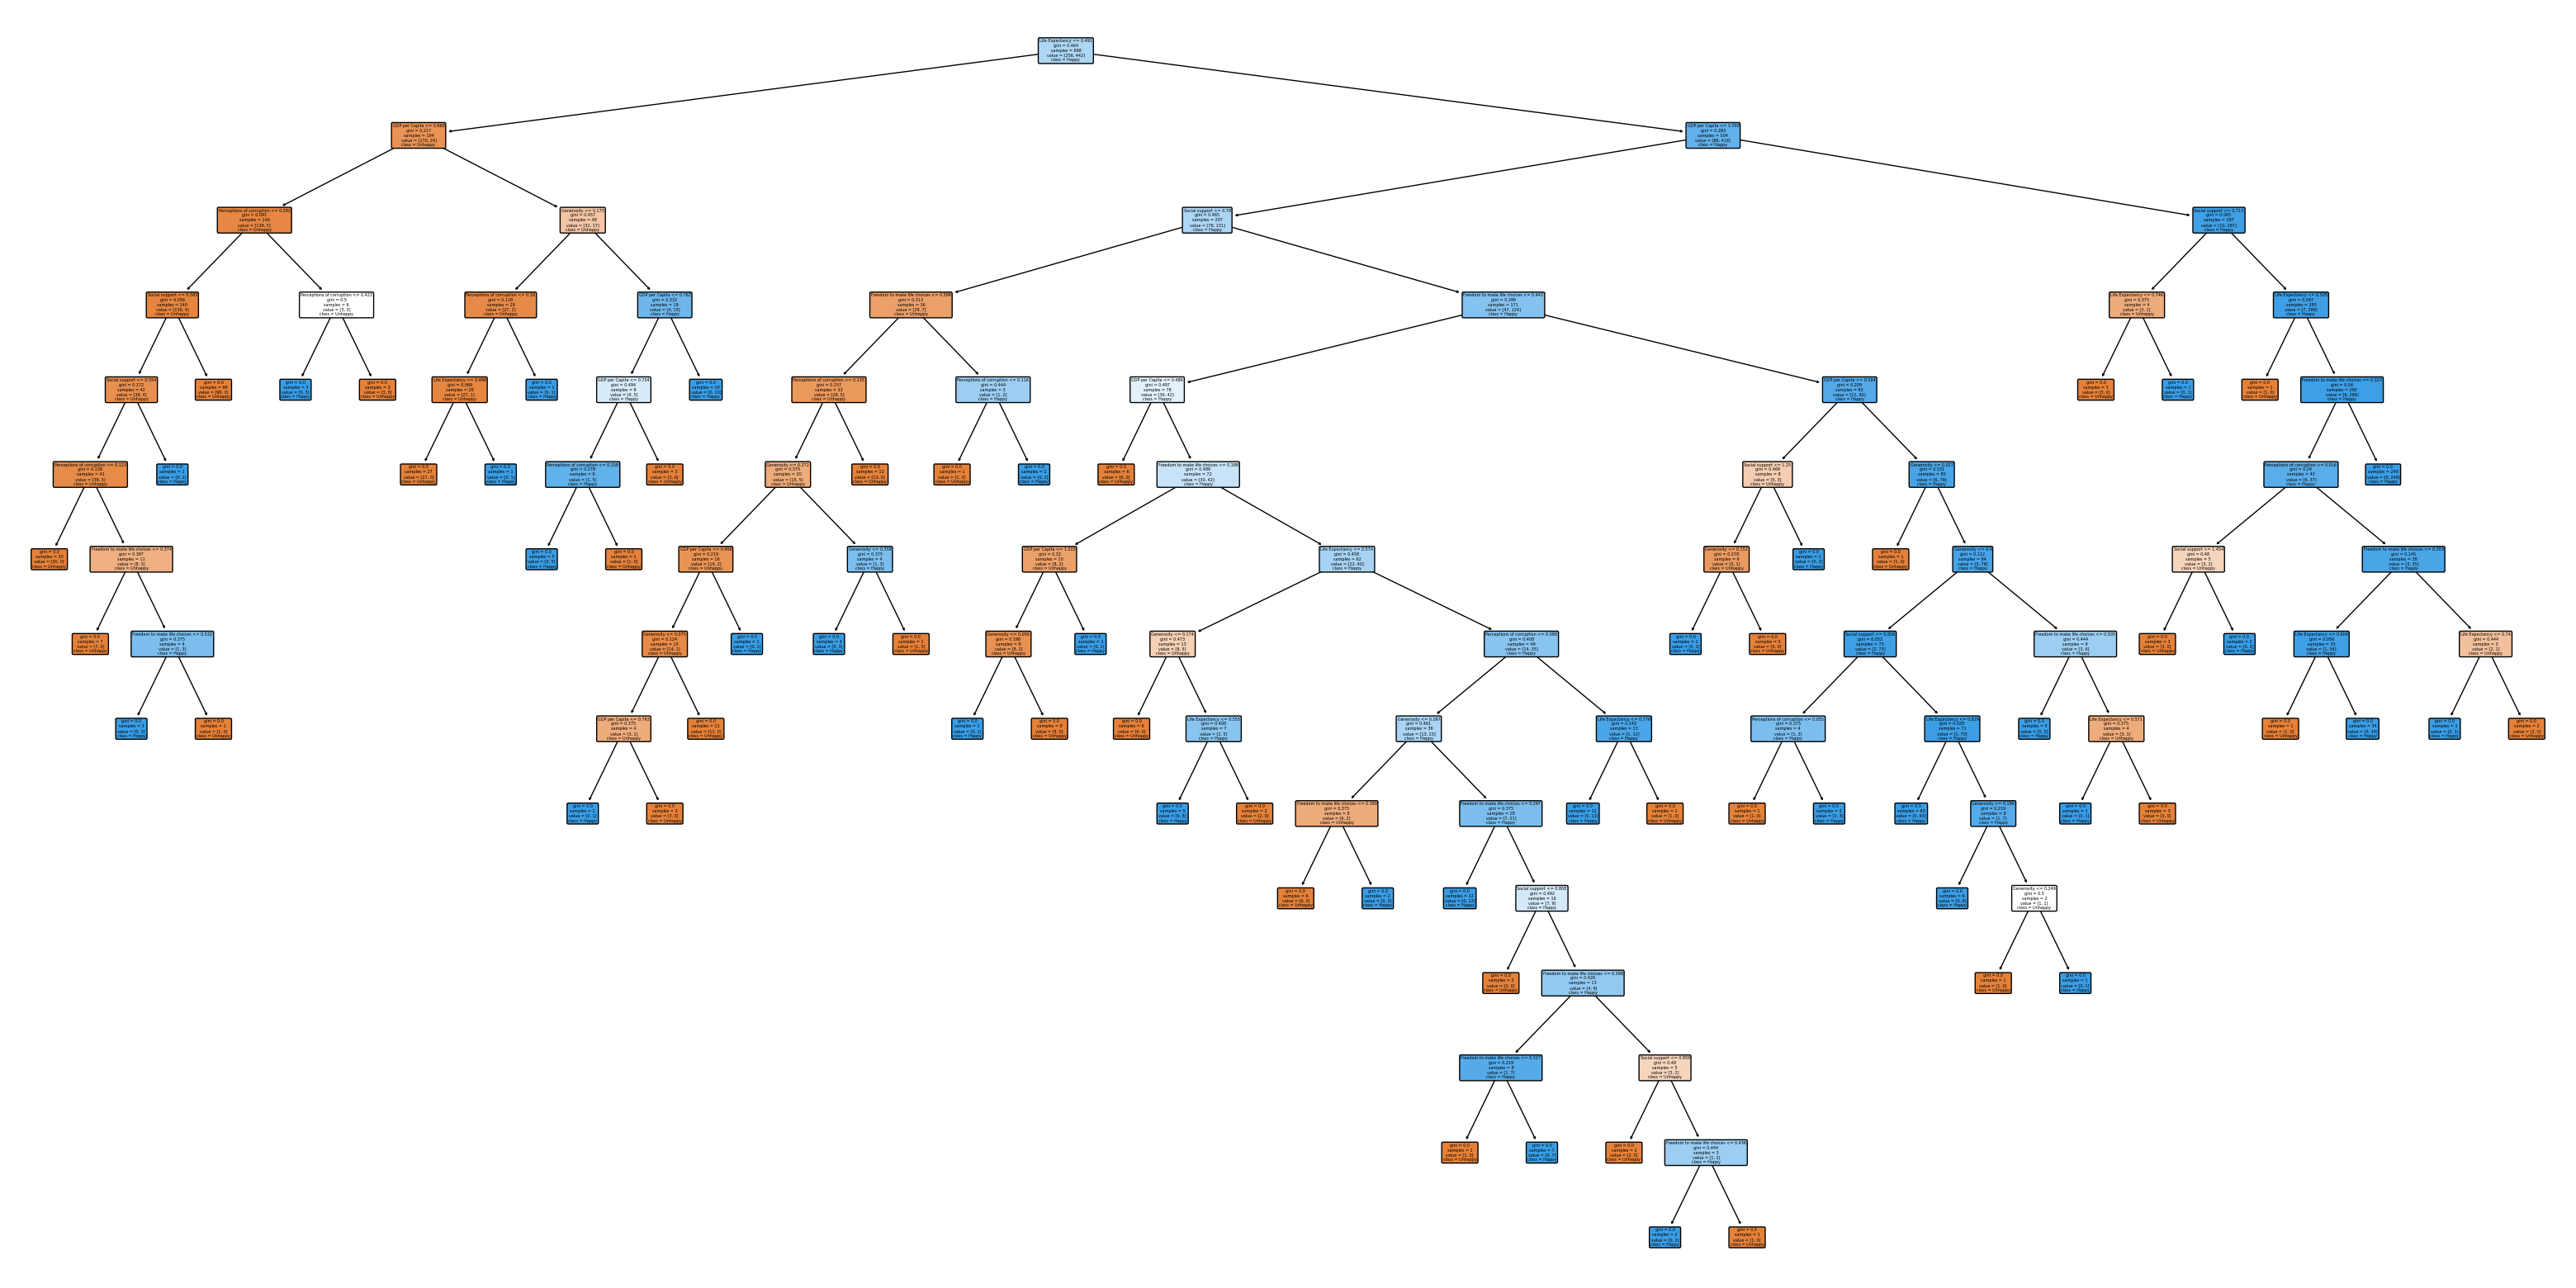

In [13]:
plt.figure(figsize=(40,20))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["Unhappy","Happy"],feature_names=X.columns)

## Evaluation of the Model

In [14]:
print("THE TRAINING ACCURACY :", clf_dt.score(X_train, Y_train))

THE TRAINING ACCURACY : 1.0


In [15]:
print("THE TEST ACCURACY :", clf_dt.score(X_test,Y_test))

THE TEST ACCURACY : 0.8454935622317596


/Users/khumisoletlhogile/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


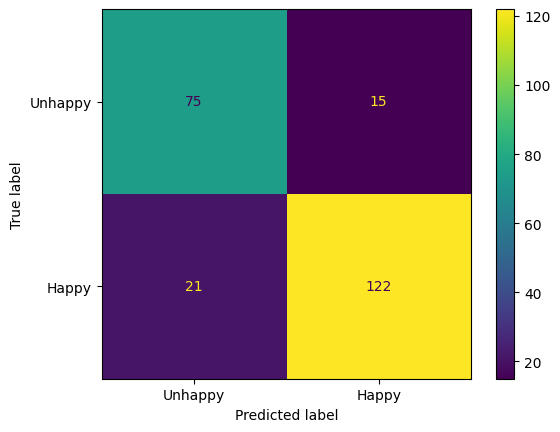

In [16]:
plot_confusion_matrix(clf_dt,X_test,Y_test,display_labels=["Unhappy","Happy"])

# Pruning

In [17]:
path = clf_dt.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas = path.ccp_alphas # Getting different values of alpha(Prunig parameter)
ccp_alphas = ccp_alphas[:-1] # exclude maximum

clf_dts=[]

for ccp_alpha in ccp_alphas:
    clt_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,Y_train)
    clf_dts.append(clf_dt)

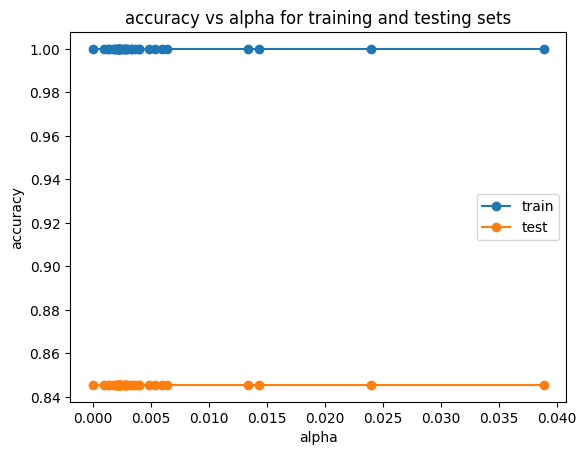

In [18]:
train_scores = [clf_dt.score(X_train,Y_train) for clf_dt in  clf_dts]
test_scores = [clf_dt.score(X_test,Y_test) for clf_dt in  clf_dts]

fit, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test",drawstyle="steps-post")
ax.legend()
plt.show()

Test Accuracy doesnt improve with different levels of ALPHAS therefore no need to prune

In [19]:
clf_dt_pruned= DecisionTreeClassifier(random_state=42, ccp_alpha = 0.038)

<AxesSubplot: xlabel='tree'>

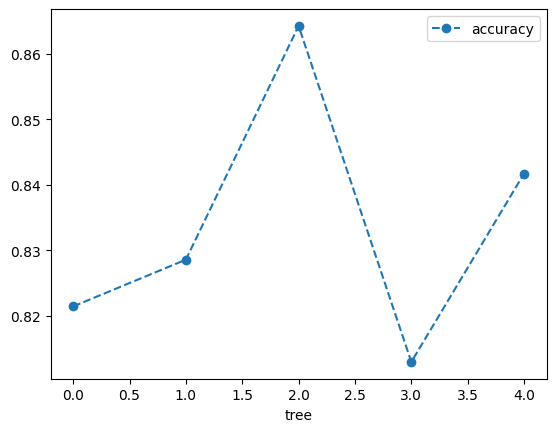

In [20]:
scores = cross_val_score(clf_dt_pruned,X_train,Y_train, cv=5)
df= pd.DataFrame(data={'tree':range(5), 'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [21]:
clf_dt_pruned = clf_dt_pruned.fit(X_train,Y_train)

/Users/khumisoletlhogile/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


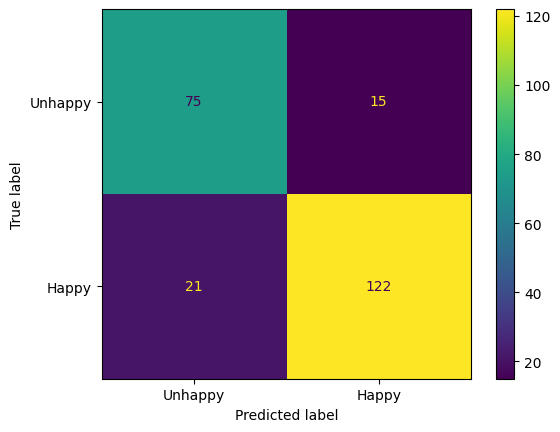

In [22]:
plot_confusion_matrix(clf_dt_,X_test,Y_test,display_labels=["Unhappy","Happy"])

In [23]:
print("THE TEST ACCURACY :", clf_dt_pruned.score(X_test,Y_test))

THE TEST ACCURACY : 0.8326180257510729


[Text(0.4, 0.8333333333333334, 'Life Expectancy <= 0.491\ngini = 0.464\nsamples = 698\nvalue = [256, 442]\nclass = Happy'),
 Text(0.2, 0.5, 'gini = 0.217\nsamples = 194\nvalue = [170, 24]\nclass = Unhappy'),
 Text(0.6, 0.5, 'GDP per Capita <= 1.059\ngini = 0.283\nsamples = 504\nvalue = [86, 418]\nclass = Happy'),
 Text(0.4, 0.16666666666666666, 'gini = 0.465\nsamples = 207\nvalue = [76, 131]\nclass = Happy'),
 Text(0.8, 0.16666666666666666, 'gini = 0.065\nsamples = 297\nvalue = [10, 287]\nclass = Happy')]

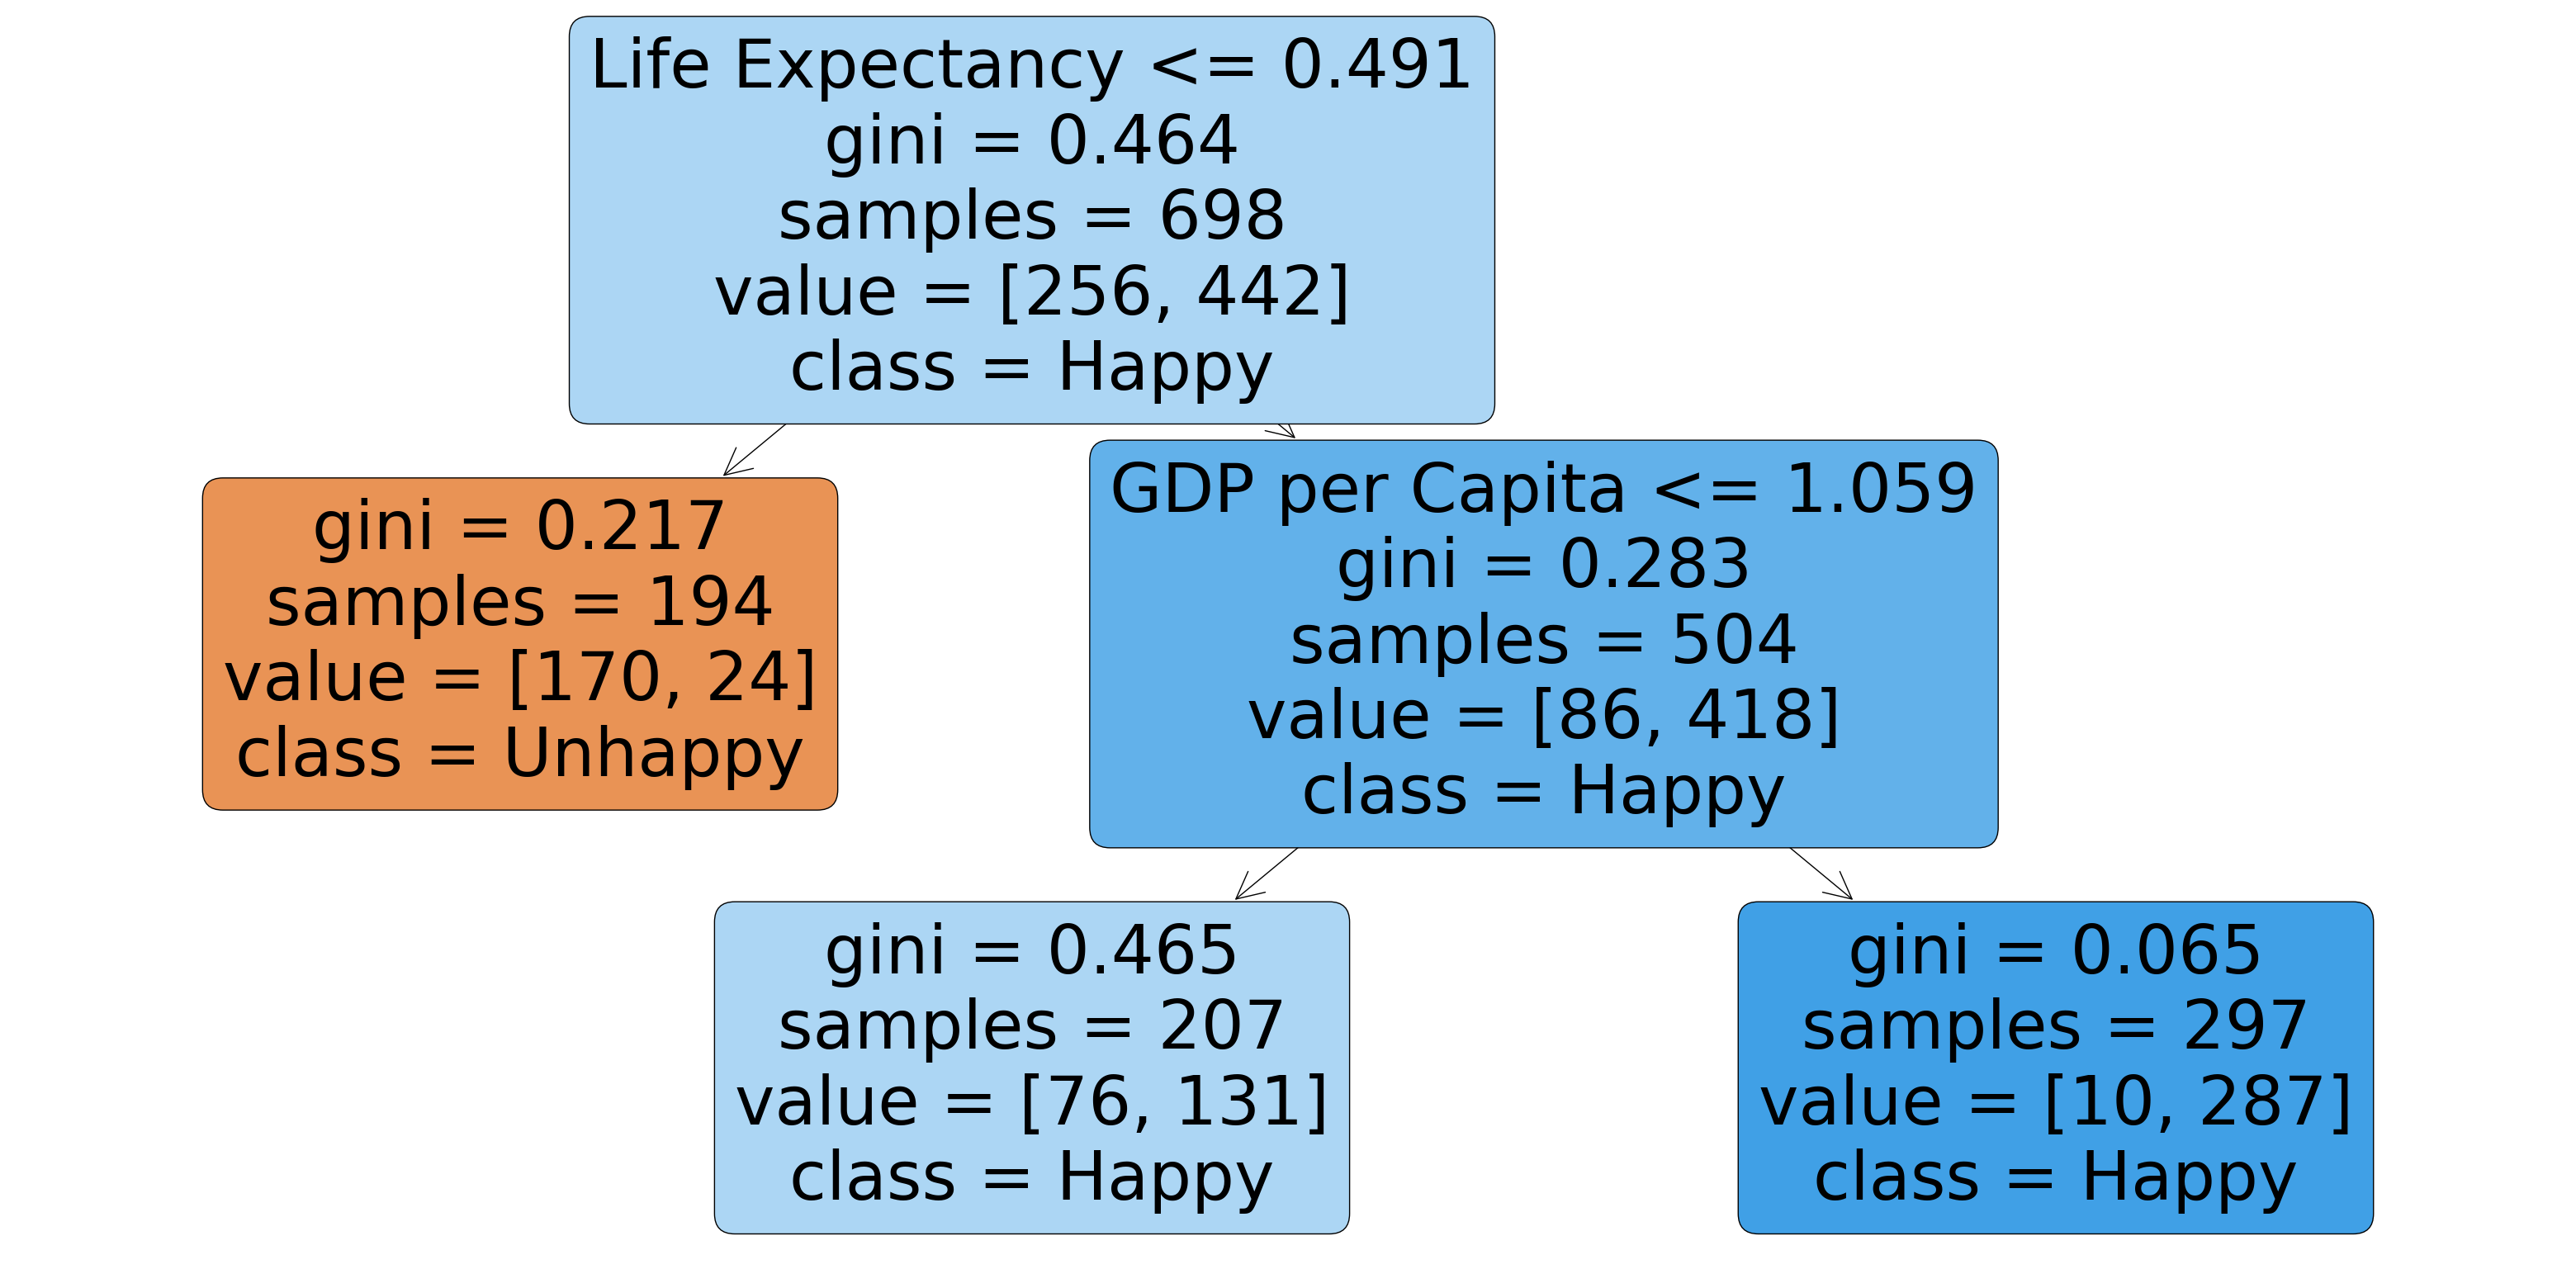

In [24]:
plt.figure(figsize=(40,20))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["Unhappy","Happy"],feature_names=X.columns)

In [25]:
clf_dt_pruned2= DecisionTreeClassifier(random_state=42, ccp_alpha = 0.040)

In [26]:
clf_dt_pruned2 = clf_dt_pruned2.fit(X_train,Y_train)

[Text(0.5, 0.75, 'Life Expectancy <= 0.491\ngini = 0.464\nsamples = 698\nvalue = [256, 442]\nclass = Happy'),
 Text(0.25, 0.25, 'gini = 0.217\nsamples = 194\nvalue = [170, 24]\nclass = Unhappy'),
 Text(0.75, 0.25, 'gini = 0.283\nsamples = 504\nvalue = [86, 418]\nclass = Happy')]

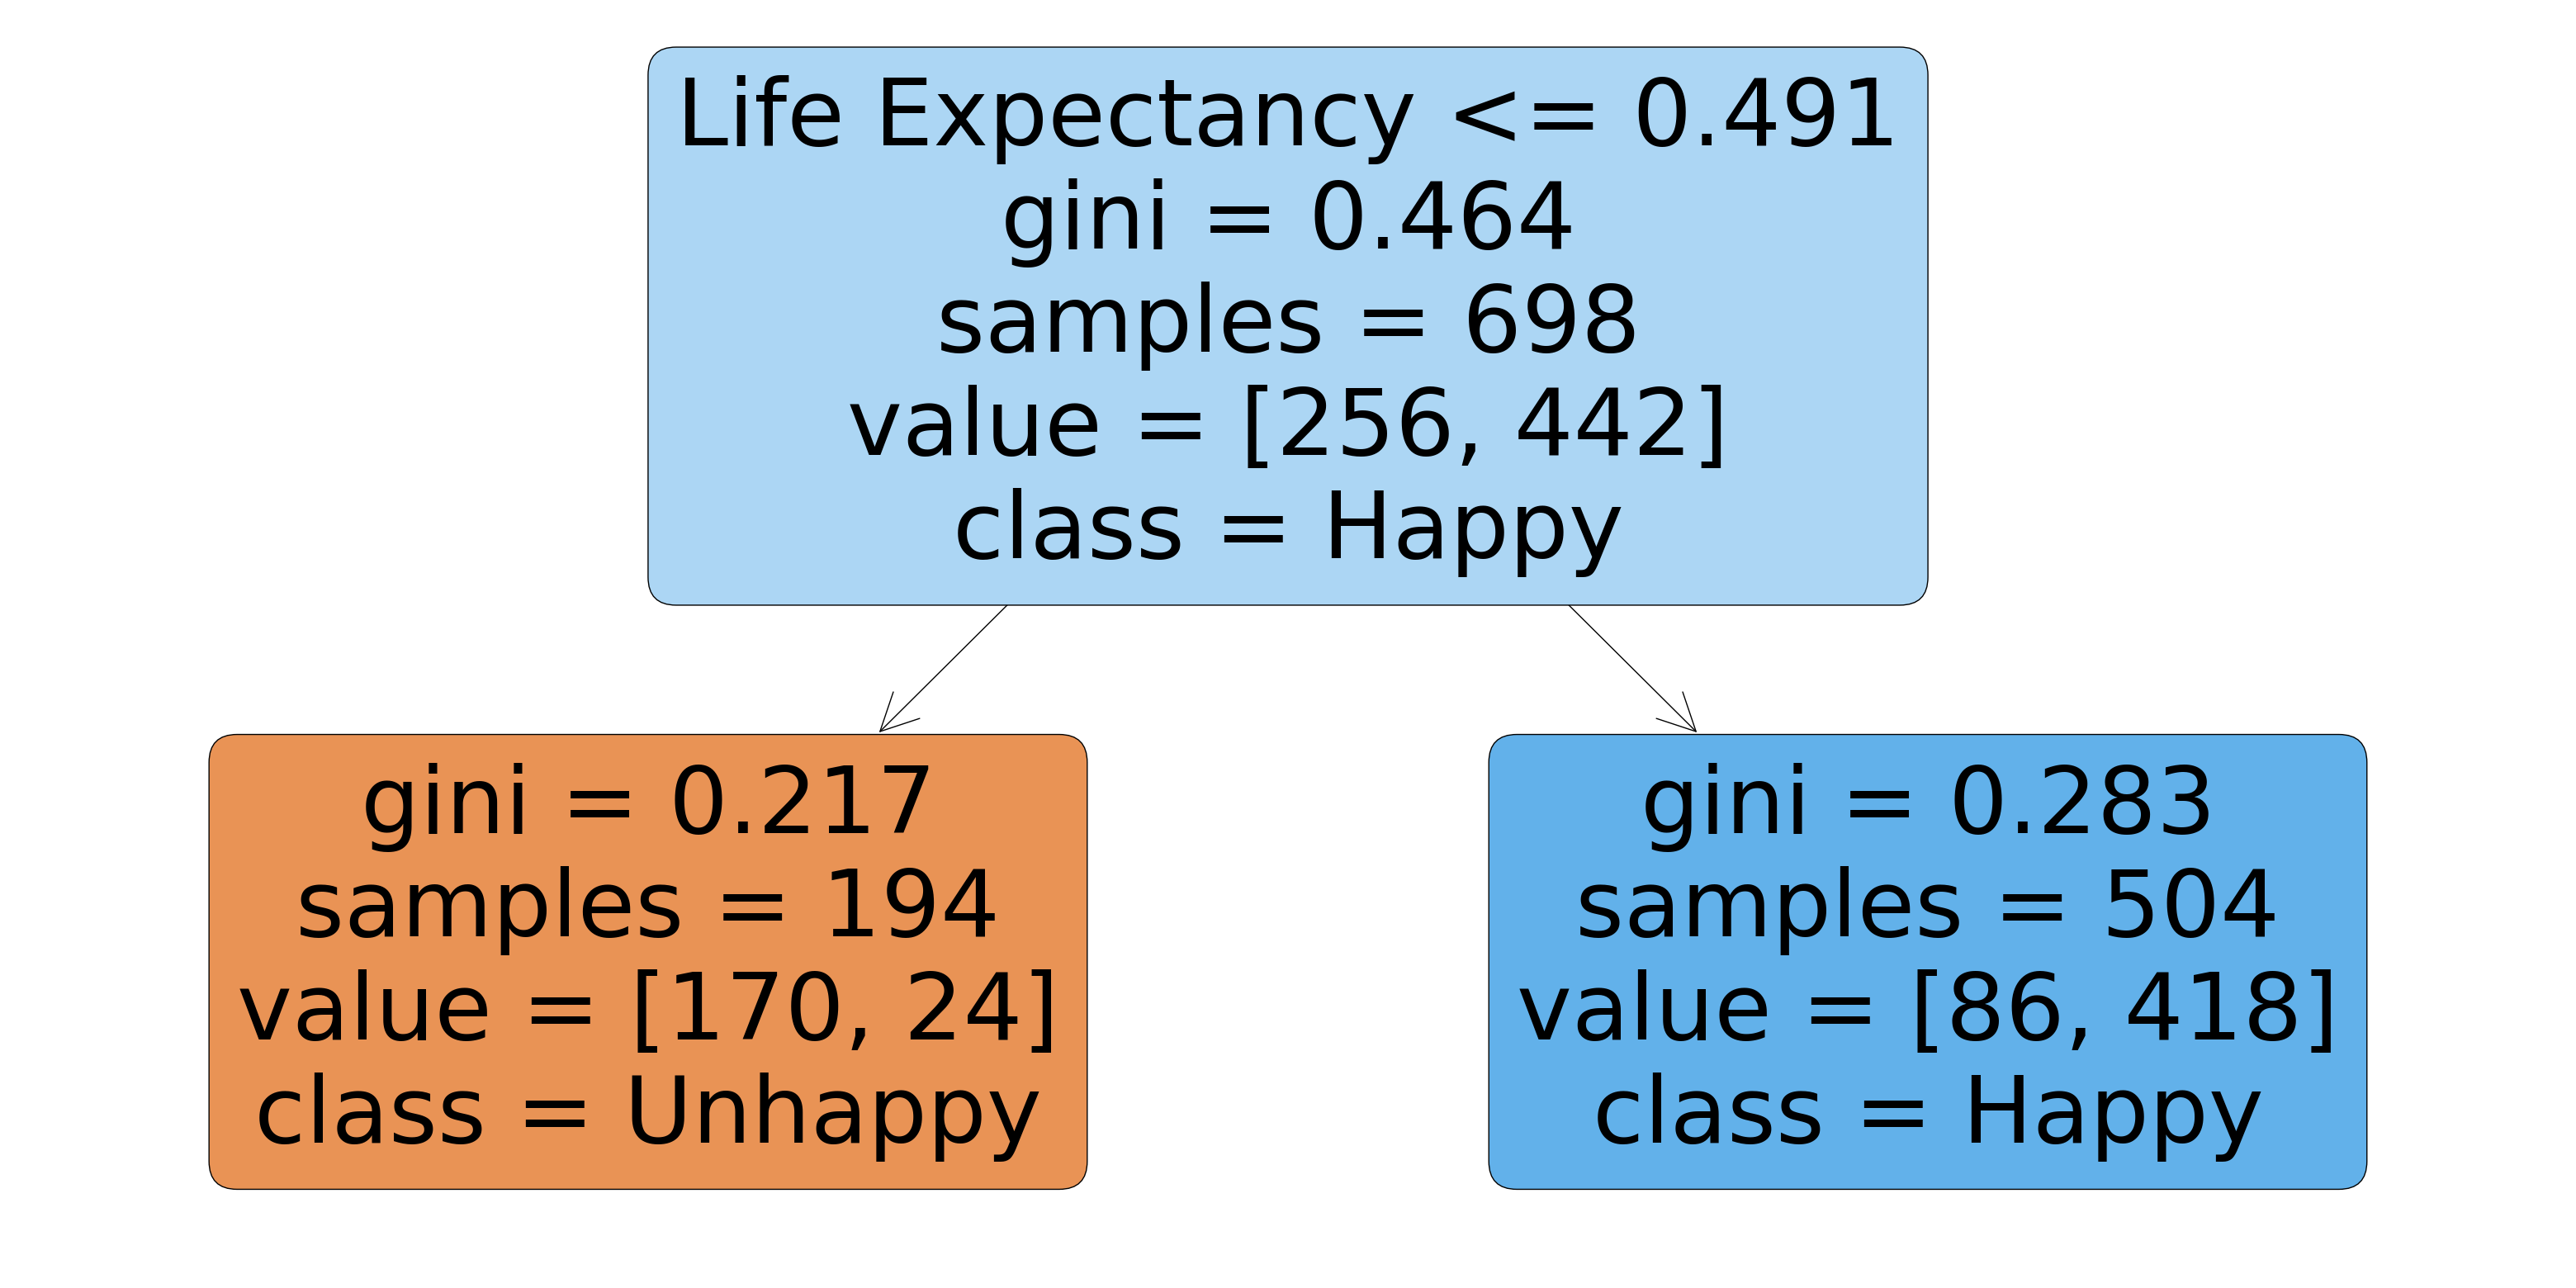

In [27]:
plt.figure(figsize=(40,20))
plot_tree(clf_dt_pruned2,filled=True,rounded=True,class_names=["Unhappy","Happy"],feature_names=X.columns)

In [28]:
print("THE TEST ACCURACY :", clf_dt_pruned2.score(X_test,Y_test))

THE TEST ACCURACY : 0.8326180257510729
